№ 3, 7, 15, 18, 19, 22, 40, 47, 55, 59 (стр. 182 - ...)


In [1]:
# задание 3
from sympy import *

x = symbols('x')

#y = tan(log(x)) - 2*E**(-x) + 1/cos(2*x)
y = tan(log(x)) - 2*exp(-x) + 1/cos(2*x)

print(diff(y,x))


2*sin(2*x)/cos(2*x)**2 + 2*exp(-x) + (tan(log(x))**2 + 1)/x


In [2]:
# задание 7
# найти вторую произв от ф-ии
from sympy import *

x = symbols('x')


y = sin(x)**5/3*x

print(diff(y,x,2).subs(x,pi))

0


In [3]:
# задание 15
from sympy import *

x = symbols('x')

y = x**2*exp(2*x)

print(diff(y,x,20))

1048576*(x**2 + 20*x + 95)*exp(2*x)


In [4]:
# задание 18
from sympy import *

y = x**3*exp(-x)

y_diff = diff(y,x,2)
print(solve(y_diff, x))

[0, 3 - sqrt(3), sqrt(3) + 3]


In [5]:
# задание 19
from sympy import *

f = det(Matrix([[x,x**2,x**3],[1,2*x,3*x**2],[0,2,6*x]]))
print(diff(f,x).simplify())


6*x**2


2*x*sin(1/x) - cos(1/x)
0


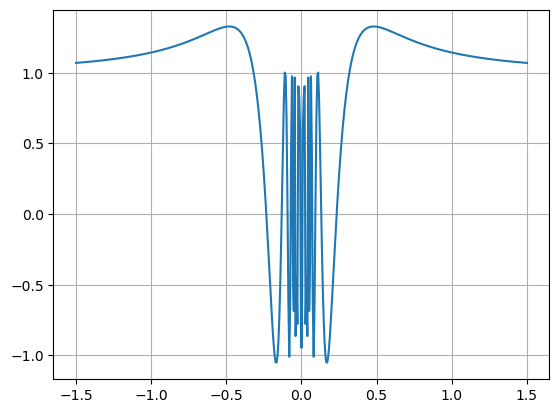

In [6]:
# задание 22
from sympy import *
import numpy as np
import matplotlib.pyplot as plt

x = symbols('x')
y_1 = x**2*sin(1/x)
y_1_diff = diff(y_1,x)
print(y_1_diff)

y_2 = 0
y_2_diff = diff(y_2, x)
print(y_2_diff)

def f_prime(x):
    if x != 0:
        return 2*x*sin(1/x) - cos(1/x)
    else:
        return 0

x = np.linspace(-1.5, 1.5, 500)
y = np.vectorize(f_prime)(x)

plt.plot(x, y)
plt.grid(True)
plt.show()



In [7]:
# задание 40
from sympy import *

def tangent(y,x0):
  y0 = y.subs(x, x0)
  x1 = x0 + 1
  k = diff(y,x).subs(x, x0)
  y1 = y0 + k
  return Line((x0, y0),(x1, y1))

x = symbols('x')
x0 = 1
y = 2*x**2-6*x+3
y0 = y.subs(x, x0)

l = tangent(y, x0)
print('Уравнение касательной:',l.equation())

p = Point(x0, y0)
print('Уравнение нормали:',l.perpendicular_line(p).equation())

Уравнение касательной: 2*x + y - 1
Уравнение нормали: -x + 2*y + 3


In [8]:
# задание 47
from sympy import *

x = symbols('x')
y = x**3 - 3*x**2 + x + 1

x_min = solve(diff(y,x))[0]
print('x_min: %.4f, y(x_min): %.3f' % (x_min, y.subs(x, x_min)))

x_max = solve(diff(y,x))[1]
print('x_max: %.4f, y(x_max): %.3f' % (x_max, y.subs(x, x_max)))


x_min: 0.1835, y(x_min): 1.089
x_max: 1.8165, y(x_max): -1.089


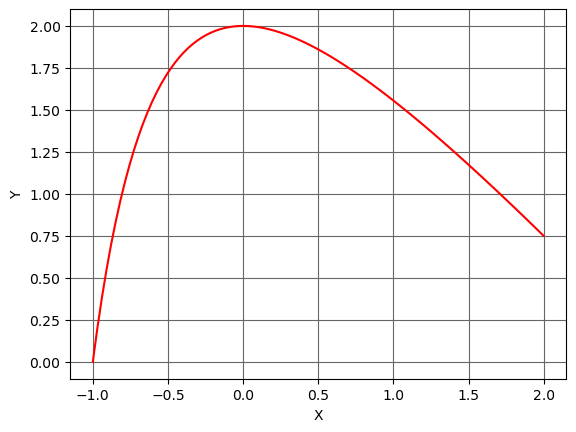

xmin: 0.0
xmax: 2.0
Значение функции на концах: 
y(-1): 0.000 
у(2): 0.750


In [9]:
# задание 55
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

fun = lambda x: 3 - x - 4/(x+2)**2
x = np.linspace(-1,2,100)
plt.xlabel('X')
plt.ylabel('Y')
plt.plot(x, fun(x), 'r')
plt.grid(True, linestyle = '-', color = '0.4')
plt.show()

res = minimize(fun, 0)
print('xmin: %.1f' % res.x)

print('xmax:',  *fun(res.x))

print('Значение функции на концах: \ny(-1): %.3f \nу(2): %.3f' % (fun(-1), fun(2)))

In [10]:
# задание 59
from sympy import *

def study_function(y, singp=0, asimp=True):
    if asimp:
        if singp != 0:
            for i in range(0, len(singp)):
                lim = limit(y,x,singp[i])
                if abs(lim) == oo:
                    print('Вертикальная асимптота: x =', singp[i])
        '''Горизонтальные асимптоты'''
        lp = limit(y, x, +oo)
        lm = limit(y, x, -oo)
        if (abs(lp) != oo) & (abs(lm) != oo):
            print('Горизонтальная асимптота: y=', lp)
        elif (abs(lp) != oo) & (abs(lm) == oo):
            print('Горизонтальная асимптота при x -> +oo, y=', lp)
        elif (abs(lp) == oo) & (abs(lm) != oo):
            print('Горизонтальная асимптота при x -> -oo, y=', lm)
        '''Наклонные асимптоты'''
        kp = limit(y/x, x, oo, '+')
        km = limit(y/x, x, oo, '-')
        if (kp != 0) & (km != 0):
            if (kp != oo) & (km != oo):
                b = limit(y-kp*x, x, oo)
                if b != oo:
                    print('Наклонная асимптота: y = ', kp*x+b)
            elif(kp != oo) & (km == oo):
                b = limit(y-kp*x, x, oo, '+')
                if b != oo:
                    print('Наклонная асимптота при x -> +oo: y =', kp*x+b)
        '''' Производные '''
        у_ = diff(y,x)
        print("у': ", у_.simplify())
        у2_ = diff(y, x, 2)
        print('у": ', у2_.simplify())
        уЗ_ = diff(y, x, 3)
        ''' Поиск критических точек '''
        roots_diff = solve(у_,x)
        k = len(roots_diff)
        if k > 0:
            for i in range(0, k):
                ''' Проверка второй производной '''
                ri = roots_diff[i]
                y2_0 = у2_.subs(x, ri)
                if y2_0 > 0:
                    print('x = %s - точка минимума, y_min = %s' % (ri, y.subs(x,ri)))
                elif y2_0 < 0:
                    print('x = %s - точка максимума, y_max = %s' % (ri, y.subs(x,ri)))
                else:
                    '''Проверка, не является ли критическая точка, точкой перегиба'''
                    y3_0 = уЗ_.subs(x,ri)
                    if y3_0 != 0:
                        print('x = %s - точка перегиба, у(х) = %s' % (ri, y.subs(x,ri)))
                    else:
                        print('B критической точке требуется дополнительное исследование', ri)
        roots_2diff = solve(у2_)
        k = len(roots_2diff)
        if k > 0:
          for i in range(0, k):
            ri = roots_2diff[i]
            y3_0 = уЗ_.subs(x, ri)
            y_0 = у_.subs(x, ri)
            if (y3_0 != 0) & (y_0 != 0):
                print('x = %s - точка перегиба, y(x) = %s' % (ri, y.subs(x,ri)))

x = symbols('x', real = True)
y = 1 - 2/x - x**2

study_function(y, [0])


Вертикальная асимптота: x = 0
Наклонная асимптота: y =  -oo*x + Limit(-x**2 + oo*x + 1 - 2/x, x, oo, dir='-')
у':  -2*x + 2/x**2
у":  -2 - 4/x**3
x = 1 - точка максимума, y_max = -2
x = -2**(1/3) - точка перегиба, y(x) = 1
